<a href="https://colab.research.google.com/github/pujithanelluri/pdsassignment1/blob/main/PDS%20Assignment%201/PDS%20Question1/src/Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Optimization terminated successfully.
         Current function value: 0.490347
         Iterations 6


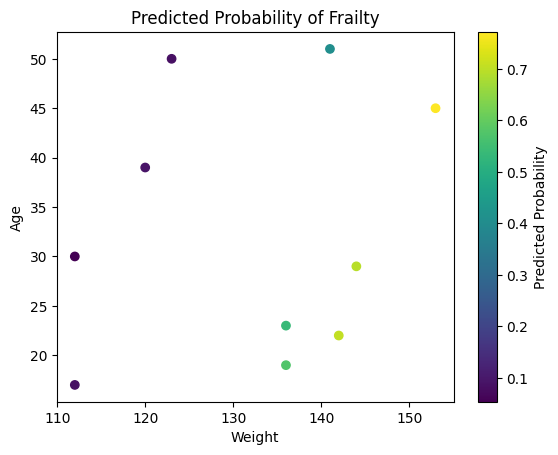

In [5]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import base64

# Create a DataFrame from the provided data
data = {
    'Height': [65.8, 71.5, 69.4, 68.2, 67.8, 68.7, 69.8, 70.1, 67.9, 66.8],
    'Weight': [112, 136, 153, 142, 144, 123, 141, 136, 112, 120],
    'Age': [30, 19, 45, 22, 29, 50, 51, 23, 17, 39],
    'Gripstrength': [30, 31, 29, 28, 24, 26, 22, 20, 19, 31],
    'Frailty': [0, 0, 0, 1, 1, 0, 1, 1, 0, 0]
}

df = pd.DataFrame(data)

# Define the independent variables (Weight and Age) and the dependent variable (Frailty)
X = df[['Weight', 'Age']]
y = df['Frailty']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Calculate predicted probabilities
df['Predicted Probability'] = result.predict(X)

# Calculate odds ratios
odds_ratio_weight = result.params['Weight']
odds_ratio_age = result.params['Age']

# Visualize the results (scatter plot)
plt.scatter(df['Weight'], df['Age'], c=df['Predicted Probability'], cmap='viridis')
plt.xlabel('Weight')
plt.ylabel('Age')
plt.title('Predicted Probability of Frailty')
plt.colorbar(label='Predicted Probability')

# Save the scatter plot as an image (PNG)
plot_filename = '/content/drive/Othercomputers/PDS Assignment 1/PDS Question1/Stage 3 (Results)/scatter_plot.png'
plt.savefig(plot_filename)

# Encode the image as base64
with open(plot_filename, "rb") as image_file:
    encoded_image = base64.b64encode(image_file.read()).decode('utf-8')

# Create an HTML file that includes the image and odds ratios
html_content = f"""
<!DOCTYPE html>
<html>
<head>
    <title>Results</title>
</head>
<body>
    <h1>Logistic Regression Results</h1>
    <p>{result.summary().as_text()}</p>
    <h2>Odds Ratios</h2>
    <p>Weight Odds Ratio: {odds_ratio_weight:.4f}</p>
    <p>Age Odds Ratio: {odds_ratio_age:.4f}</p>
    <h2>Scatter Plot</h2>
    <img src="data:image/png;base64,{encoded_image}" alt="Scatter Plot">
</body>
</html>
"""

# Save the HTML content to a file
with open('/content/drive/Othercomputers/PDS Assignment 1/PDS Question1/Stage 3 (Results)/results.html', 'w') as html_file:
    html_file.write(html_content)